<a href="https://colab.research.google.com/github/prem-charan/gear-crack-detection-using-ml/blob/main/gear_crack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

gear_c1 = pd.read_csv('/content/drive/MyDrive/gear_dataset/L3-C1-420.csv')

gear_c2 = pd.read_csv('/content/drive/MyDrive/gear_dataset/L3-C2-420.csv')
gear_c3 = pd.read_csv('/content/drive/MyDrive/gear_dataset/L3-C3-420.csv')
gear_h = pd.read_csv('/content/drive/MyDrive/gear_dataset/L3-H-420.csv')

gear_h


<ipython-input-2-856119a8c17c>:7: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  gear_c1 = pd.read_csv('/content/drive/MyDrive/gear_dataset/L3-C1-420.csv')
<ipython-input-2-856119a8c17c>:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  gear_c2 = pd.read_csv('/content/drive/MyDrive/gear_dataset/L3-C2-420.csv')
<ipython-input-2-856119a8c17c>:10: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  gear_c3 = pd.read_csv('/content/drive/MyDrive/gear_dataset/L3-C3-420.csv')
<ipython-input-2-856119a8c17c>:11: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  gear_h = pd.read_csv('/content/drive/MyDrive/gear_dataset/L3-H-420.csv')


,Time,X-axis,Y-axis,Z-axis
0,s,m/s2,m/s2,m/s2
1,0,0.14301689,0.045512851,0.10086592
2,0.00015625,0.15915126,0.26293805,0.0960989
3,0.0003125,0.2159241,0.0097751617,0.20082599
4,0.00046875,0.21914412,-0.16051845,0.21890892
...,...,...,...,...
650609,101.6575,0.009477,0.069656,0.067282
650610,101.657656,0.020827,0.01492,-0.006533
650611,101.657813,-0.103612,-0.113977,0.017483
650612,101.657969,-0.048083,0.259588,-0.102451


In [3]:
# dropping missing values from the dataset
reduced_gear_c1 = gear_c1.dropna(subset=['Time', 'X-axis', 'Y-axis', 'Z-axis'])
reduced_gear_c2 = gear_c2.dropna(subset=['Time', 'X-axis', 'Y-axis', 'Z-axis'])
reduced_gear_c3 = gear_c3.dropna(subset=['Time', 'X-axis', 'Y-axis', 'Z-axis'])
reduced_gear_h = gear_h.dropna(subset=['Time', 'X-axis', 'Y-axis', 'Z-axis'])

reduced_gear_c1

,Time,X-axis,Y-axis,Z-axis
0,s,m/s2,m/s2,m/s2
1,0,0.034872144,0.28304049,0.14573924
2,0.00015625,0.0054466315,0.014029051,0.17542833
3,0.0003125,0.080237903,-0.17762184,0.20483436
4,0.00046875,0.10353167,-0.13415436,0.21266991
...,...,...,...,...
646022,100.940781,-0.006577,0.060107,-0.037038
646023,100.940938,0.066045,-0.233763,0.012048
646024,100.941094,0.093632,-0.080372,-0.015603
646026,100.941406,-0.044452,0.10646,-0.059231


In [ ]:
print(reduced_gear_c1.dtypes)

Time      float64
X-axis    float64
Y-axis    float64
Z-axis    float64
dtype: object


In [4]:
reduced_gear_c1['X-axis'] = pd.to_numeric(reduced_gear_c1['X-axis'], errors='coerce')
reduced_gear_c1['Y-axis'] = pd.to_numeric(reduced_gear_c1['Y-axis'], errors='coerce')
reduced_gear_c1['Z-axis'] = pd.to_numeric(reduced_gear_c1['Z-axis'], errors='coerce')
reduced_gear_c1['Time'] = pd.to_numeric(reduced_gear_c1['Time'], errors='coerce')
print(reduced_gear_c1.dtypes)

<ipython-input-4-d1ebe05b8ac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_gear_c1['X-axis'] = pd.to_numeric(reduced_gear_c1['X-axis'], errors='coerce')
<ipython-input-4-d1ebe05b8ac3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_gear_c1['Y-axis'] = pd.to_numeric(reduced_gear_c1['Y-axis'], errors='coerce')
<ipython-input-4-d1ebe05b8ac3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Time      float64
X-axis    float64
Y-axis    float64
Z-axis    float64
dtype: object


<ipython-input-4-d1ebe05b8ac3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_gear_c1['Time'] = pd.to_numeric(reduced_gear_c1['Time'], errors='coerce')


In [5]:
reduced_gear_c2['X-axis'] = pd.to_numeric(reduced_gear_c2['X-axis'], errors='coerce')
reduced_gear_c2['Y-axis'] = pd.to_numeric(reduced_gear_c2['Y-axis'], errors='coerce')
reduced_gear_c2['Z-axis'] = pd.to_numeric(reduced_gear_c2['Z-axis'], errors='coerce')
reduced_gear_c2['Time'] = pd.to_numeric(reduced_gear_c2['Time'], errors='coerce')

reduced_gear_c3['X-axis'] = pd.to_numeric(reduced_gear_c3['X-axis'], errors='coerce')
reduced_gear_c3['Y-axis'] = pd.to_numeric(reduced_gear_c3['Y-axis'], errors='coerce')
reduced_gear_c3['Z-axis'] = pd.to_numeric(reduced_gear_c3['Z-axis'], errors='coerce')
reduced_gear_c3['Time'] = pd.to_numeric(reduced_gear_c3['Time'], errors='coerce')

reduced_gear_h['X-axis'] = pd.to_numeric(reduced_gear_h['X-axis'], errors='coerce')
reduced_gear_h['Y-axis'] = pd.to_numeric(reduced_gear_h['Y-axis'], errors='coerce')
reduced_gear_h['Z-axis'] = pd.to_numeric(reduced_gear_h['Z-axis'], errors='coerce')
reduced_gear_h['Time'] = pd.to_numeric(reduced_gear_h['Time'], errors='coerce')

<ipython-input-5-c4bada3361aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_gear_c2['X-axis'] = pd.to_numeric(reduced_gear_c2['X-axis'], errors='coerce')
<ipython-input-5-c4bada3361aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_gear_c2['Y-axis'] = pd.to_numeric(reduced_gear_c2['Y-axis'], errors='coerce')
<ipython-input-5-c4bada3361aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

<ipython-input-23-aa0896396408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_gear_c1['Time'] = pd.to_datetime(reduced_gear_c1['Time'], unit='s')


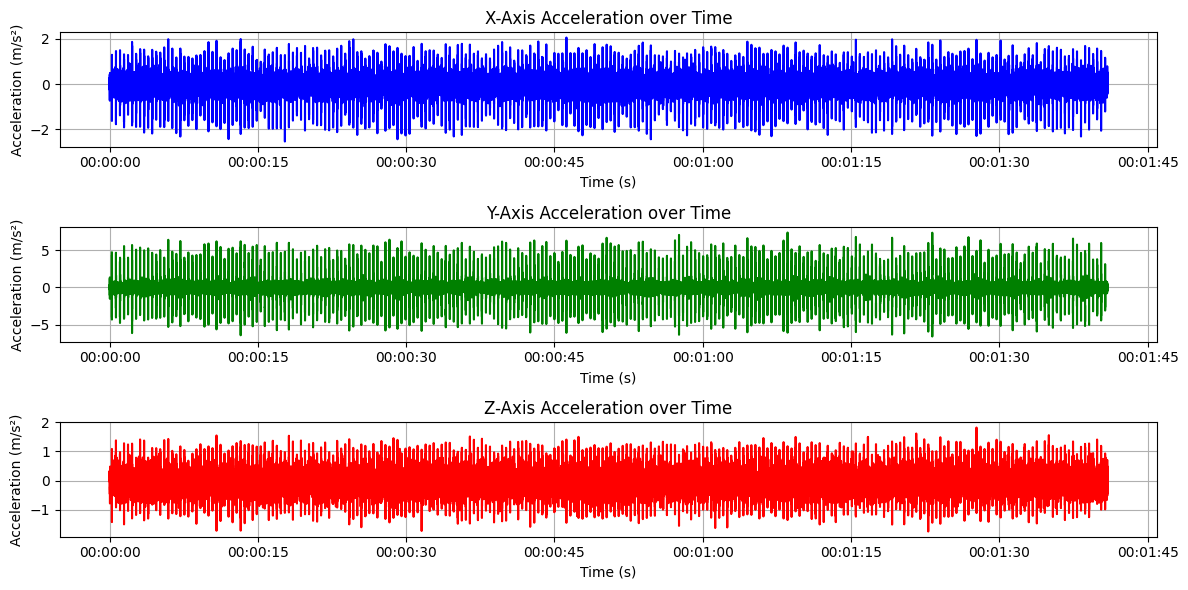

In [ ]:
plt.figure(figsize=(12, 6))

# Plot X-axis acceleration
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st plot
plt.plot(reduced_gear_c1['Time'], reduced_gear_c1['X-axis'], color='blue', label='X-axis')
plt.title('X-Axis Acceleration over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.grid(True)

# Plot Y-axis acceleration
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd plot
plt.plot(reduced_gear_c1['Time'], reduced_gear_c1['Y-axis'], color='green', label='Y-axis')
plt.title('Y-Axis Acceleration over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.grid(True)

# Plot Z-axis acceleration
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd plot
plt.plot(reduced_gear_c1['Time'], reduced_gear_c1['Z-axis'], color='red', label='Z-axis')
plt.title('Z-Axis Acceleration over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.grid(True)

# Adjust the layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


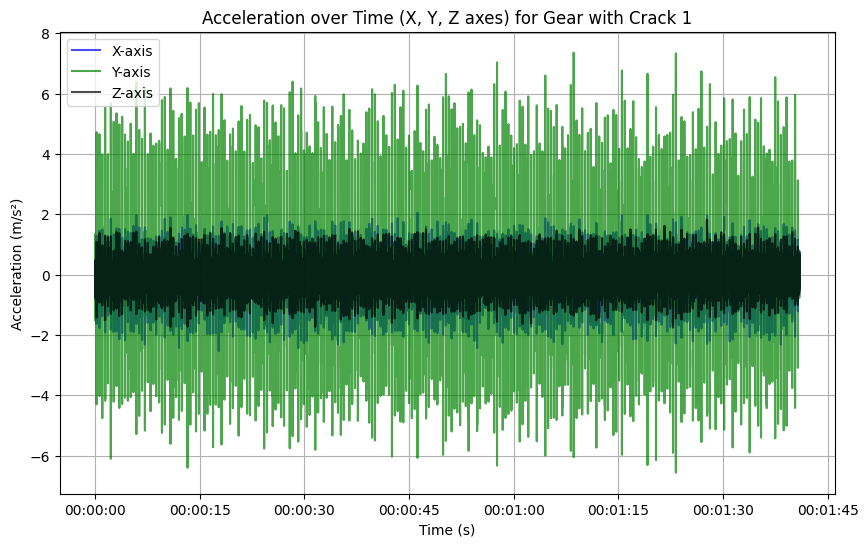

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(reduced_gear_c1['Time'], reduced_gear_c1['X-axis'], label='X-axis', color='blue', alpha=0.7, linewidth=1.5)
plt.plot(reduced_gear_c1['Time'], reduced_gear_c1['Y-axis'], label='Y-axis', color='green', alpha=0.7, linewidth=1.5)
plt.plot(reduced_gear_c1['Time'], reduced_gear_c1['Z-axis'], label='Z-axis', color='black', alpha=0.7, linewidth=1.5)

plt.title('Acceleration over Time (X, Y, Z axes) for Gear with Crack 1')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)

plt.show()

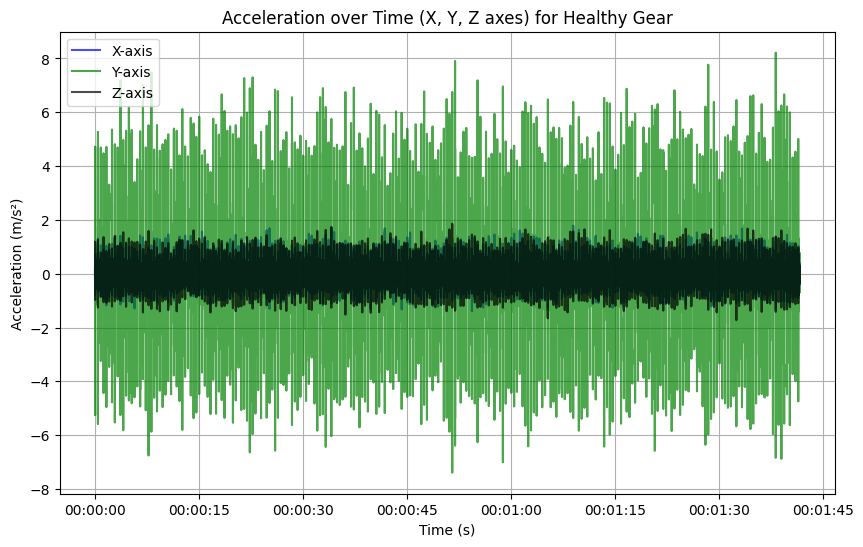

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(reduced_gear_h['Time'], reduced_gear_h['X-axis'], label='X-axis', color='blue', alpha=0.7, linewidth=1.5)
plt.plot(reduced_gear_h['Time'], reduced_gear_h['Y-axis'], label='Y-axis', color='green', alpha=0.7, linewidth=1.5)
plt.plot(reduced_gear_h['Time'], reduced_gear_h['Z-axis'], label='Z-axis', color='black', alpha=0.7, linewidth=1.5)

plt.title('Acceleration over Time (X, Y, Z axes) for Healthy Gear')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
reduced_gear_c1 = reduced_gear_c1.reset_index(drop=True)
reduced_gear_c2 = reduced_gear_c2.reset_index(drop=True)
reduced_gear_c3 = reduced_gear_c3.reset_index(drop=True)
reduced_gear_h = reduced_gear_h.reset_index(drop=True)

In [ ]:
reduced_gear_h

,Time,X-axis,Y-axis,Z-axis
0,NaT,NaN,NaN,NaN
1,1970-01-01 00:00:00.000000000,0.143017,0.045513,0.100866
2,1970-01-01 00:00:00.000156250,0.159151,0.262938,0.096099
3,1970-01-01 00:00:00.000312500,0.215924,0.009775,0.200826
4,1970-01-01 00:00:00.000468750,0.219144,-0.160518,0.218909
...,...,...,...,...
624695,1970-01-01 00:01:41.657500000,0.009477,0.069656,0.067282
624696,1970-01-01 00:01:41.657656250,0.020827,0.014920,-0.006533
624697,1970-01-01 00:01:41.657812500,-0.103612,-0.113977,0.017483
624698,1970-01-01 00:01:41.657968750,-0.048083,0.259588,-0.102451


In [9]:
reduced_gear_c1 = reduced_gear_c1.set_index('Time', drop=False)
reduced_gear_c2 = reduced_gear_c2.set_index('Time', drop=False)
reduced_gear_c3 = reduced_gear_c3.set_index('Time', drop=False)
reduced_gear_h = reduced_gear_h.set_index('Time', drop=False)


In [12]:
reduced_gear_c1['Time'] = pd.to_datetime(reduced_gear_c1['Time'], unit='s')

reduced_gear_c2['Time'] = pd.to_datetime(reduced_gear_c2['Time'], unit='s')
reduced_gear_c3['Time'] = pd.to_datetime(reduced_gear_c3['Time'], unit='s')
reduced_gear_h['Time'] = pd.to_datetime(reduced_gear_h['Time'], unit='s')

In [10]:
gear_c1_resampled = reduced_gear_c1.resample('0.25ms').mean()
gear_c1_resampled

,Time,X-axis,Y-axis,Z-axis
Time,,,,
1970-01-01 00:00:00.000000,1970-01-01 00:00:00.000078125,0.020159,0.148535,0.160584
1970-01-01 00:00:00.000250,1970-01-01 00:00:00.000390625,0.091885,-0.155888,0.208752
1970-01-01 00:00:00.000500,1970-01-01 00:00:00.000625000,0.041483,0.069957,0.133137
1970-01-01 00:00:00.000750,1970-01-01 00:00:00.000859375,0.068123,-0.081188,0.189169
1970-01-01 00:00:00.001000,1970-01-01 00:00:00.001093750,0.151843,0.050306,0.198516
...,...,...,...,...
1970-01-01 00:01:40.940500,1970-01-01 00:01:40.940625000,0.078833,0.169428,0.007949
1970-01-01 00:01:40.940750,1970-01-01 00:01:40.940859375,0.029734,-0.086828,-0.012495
1970-01-01 00:01:40.941000,1970-01-01 00:01:40.941093750,0.093632,-0.080372,-0.015603


In [11]:
gear_c2_resampled = reduced_gear_c2.resample('0.25ms').mean()
gear_c3_resampled = reduced_gear_c3.resample('0.25ms').mean()
gear_h_resampled = reduced_gear_h.resample('0.25ms').mean()


In [ ]:
gear_h_resampled

,Time,X-axis,Y-axis,Z-axis
Time,,,,
1970-01-01 00:00:00.000000,1970-01-01 00:00:00.000078125,0.151084,0.154225,0.098482
1970-01-01 00:00:00.000250,1970-01-01 00:00:00.000390625,0.217534,-0.075372,0.209867
1970-01-01 00:00:00.000500,1970-01-01 00:00:00.000625000,0.153819,-0.063332,0.157617
1970-01-01 00:00:00.000750,1970-01-01 00:00:00.000859375,0.180658,-0.008081,0.169461
1970-01-01 00:00:00.001000,1970-01-01 00:00:00.001093750,0.218037,-0.139814,0.223653
...,...,...,...,...
1970-01-01 00:01:41.657000,1970-01-01 00:01:41.657109375,-0.039999,-0.494681,0.033205
1970-01-01 00:01:41.657250,NaT,NaN,NaN,NaN
1970-01-01 00:01:41.657500,1970-01-01 00:01:41.657578125,0.015152,0.042288,0.030374


In [13]:
gear_c1_resampled = gear_c1_resampled.reset_index(drop=True)
gear_c2_resampled = gear_c2_resampled.reset_index(drop=True)
gear_c3_resampled = gear_c3_resampled.reset_index(drop=True)
gear_h_resampled = gear_h_resampled.reset_index(drop=True)


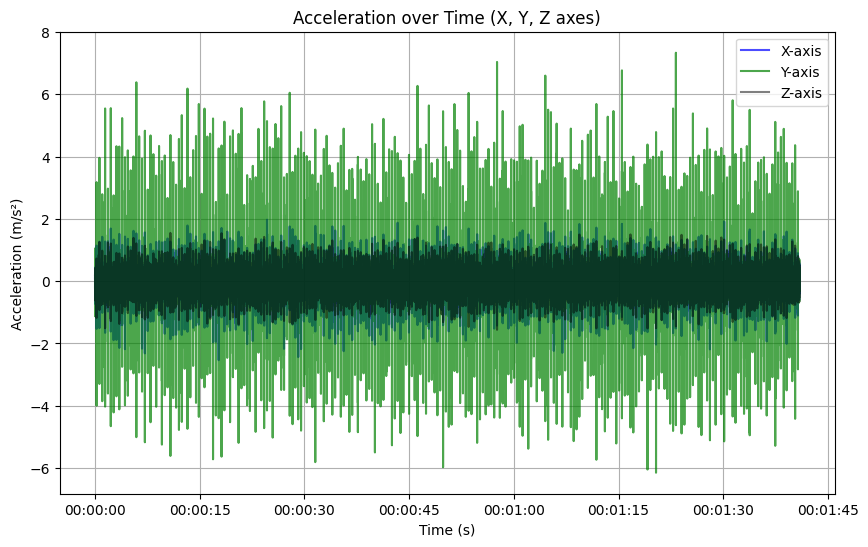

In [ ]:

plt.figure(figsize=(10, 6))

plt.plot(gear_c1_resampled['Time'], gear_c1_resampled['X-axis'], label='X-axis', color='blue', alpha=0.7, linewidth=1.5)
plt.plot(gear_c1_resampled['Time'], gear_c1_resampled['Y-axis'], label='Y-axis', color='green', alpha=0.7, linewidth=1.5)
plt.plot(gear_c1_resampled['Time'], gear_c1_resampled['Z-axis'], label='Z-axis', color='black', alpha=0.5, linewidth=1.5)

plt.title('Acceleration over Time (X, Y, Z axes)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)

plt.show()

In [14]:
print("Original Data Summary Statistics:")
print(reduced_gear_c1.describe())

print("\nResampled Data Summary Statistics:")
print(gear_c1_resampled.describe())

# Check for NaN values
print("\nNaN Values in Original Data:")
print(reduced_gear_c1.isna().sum())

print("\nNaN Values in Resampled Data:")
print(gear_c1_resampled.isna().sum())
gear_c1_resampled = gear_c1_resampled.dropna()
print("\n After dropping NaN values in Resampled Data:")
print(gear_c1_resampled.isna().sum())

Original Data Summary Statistics:
                                Time         X-axis         Y-axis  \
count                         620556  620556.000000  620556.000000   
mean   1970-01-01 00:00:50.487763852      -0.000033       0.000082   
min              1970-01-01 00:00:00      -2.536543      -6.567164   
25%    1970-01-01 00:00:25.258867187      -0.094054      -0.105783   
50%    1970-01-01 00:00:50.504218749       0.003437       0.000075   
75%    1970-01-01 00:01:15.707539062       0.099341       0.105999   
max    1970-01-01 00:01:40.941562500       2.051074       7.357460   
std                              NaN       0.188369       0.400564   

              Z-axis  
count  620556.000000  
mean       -0.000088  
min        -1.755484  
25%        -0.094672  
50%         0.007337  
75%         0.104693  
max         1.822516  
std         0.171485  

Resampled Data Summary Statistics:
                                Time         X-axis         Y-axis  \
count                 

In [ ]:
# gear_c1_resampled = gear_c1_resampled.reset_index()
print(gear_c1_resampled.dtypes)

Time      datetime64[ns]
X-axis           float64
Y-axis           float64
Z-axis           float64
dtype: object


In [15]:
print(gear_h_resampled.dtypes)

Time      datetime64[ns]
X-axis           float64
Y-axis           float64
Z-axis           float64
dtype: object


In [16]:
gear_c1_resampled = gear_c1_resampled.dropna(subset=['X-axis', 'Y-axis', 'Z-axis'])
gear_c1_resampled

,Time,X-axis,Y-axis,Z-axis
0,1970-01-01 00:00:00.000078125,0.020159,0.148535,0.160584
1,1970-01-01 00:00:00.000390625,0.091885,-0.155888,0.208752
2,1970-01-01 00:00:00.000625000,0.041483,0.069957,0.133137
3,1970-01-01 00:00:00.000859375,0.068123,-0.081188,0.189169
4,1970-01-01 00:00:00.001093750,0.151843,0.050306,0.198516
...,...,...,...,...
403762,1970-01-01 00:01:40.940625000,0.078833,0.169428,0.007949
403763,1970-01-01 00:01:40.940859375,0.029734,-0.086828,-0.012495
403764,1970-01-01 00:01:40.941093750,0.093632,-0.080372,-0.015603
403765,1970-01-01 00:01:40.941406250,-0.044452,0.106460,-0.059231


In [17]:
gear_c2_resampled = gear_c2_resampled.dropna(subset=['X-axis', 'Y-axis', 'Z-axis'])
gear_c3_resampled = gear_c3_resampled.dropna(subset=['X-axis', 'Y-axis', 'Z-axis'])
gear_h_resampled = gear_h_resampled.dropna(subset=['X-axis', 'Y-axis', 'Z-axis'])

gear_c2_resampled

,Time,X-axis,Y-axis,Z-axis
0,1970-01-01 00:00:00.000078125,0.084172,0.170212,0.083898
1,1970-01-01 00:00:00.000390625,0.114419,-0.151151,0.160306
2,1970-01-01 00:00:00.000625000,0.081277,0.068527,0.116492
3,1970-01-01 00:00:00.000859375,0.013000,0.018879,0.073736
4,1970-01-01 00:00:00.001093750,0.197986,0.031396,0.137485
...,...,...,...,...
403835,1970-01-01 00:01:40.958828125,-0.051960,-0.091703,0.007609
403836,1970-01-01 00:01:40.959062500,0.090001,0.000715,0.069105
403837,1970-01-01 00:01:40.959375000,-0.000445,-0.036302,0.020687
403838,1970-01-01 00:01:40.959609375,0.010682,0.102997,-0.042586


In [ ]:
gear_c3_resampled

,Time,X-axis,Y-axis,Z-axis
0,1970-01-01 00:00:00.000078125,0.109806,-0.203283,0.123654
1,1970-01-01 00:00:00.000468750,0.053804,0.091415,0.114963
2,1970-01-01 00:00:00.000625000,0.061649,-0.179730,0.157074
3,1970-01-01 00:00:00.000859375,-0.230814,-0.065289,-0.210162
4,1970-01-01 00:00:00.001093750,-0.012081,-0.241091,-0.004597
...,...,...,...,...
399035,1970-01-01 00:01:39.758828125,0.059468,-0.175539,0.079126
399036,1970-01-01 00:01:39.759218750,0.094226,0.212268,0.116741
399037,1970-01-01 00:01:39.759375000,0.034039,0.135710,0.059967
399038,1970-01-01 00:01:39.759609375,0.119506,0.009725,0.106997


In [ ]:
# gear_c1_resampled = gear_c1_resampled.reset_index(drop=True)
# gear_c2_resampled = gear_c2_resampled.reset_index(drop=True)
# gear_c3_resampled = gear_c3_resampled.reset_index(drop=True)
# gear_h_resampled = gear_h_resampled.reset_index(drop=True)

gear_h_resampled

,Time,X-axis,Y-axis,Z-axis
0,1970-01-01 00:00:00.000078125,0.151084,0.154225,0.098482
1,1970-01-01 00:00:00.000390625,0.217534,-0.075372,0.209867
2,1970-01-01 00:00:00.000625000,0.153819,-0.063332,0.157617
3,1970-01-01 00:00:00.000859375,0.180658,-0.008081,0.169461
4,1970-01-01 00:00:00.001093750,0.218037,-0.139814,0.223653
...,...,...,...,...
406627,1970-01-01 00:01:41.656875000,-0.122361,0.041297,-0.084334
406628,1970-01-01 00:01:41.657109375,-0.039999,-0.494681,0.033205
406630,1970-01-01 00:01:41.657578125,0.015152,0.042288,0.030374
406631,1970-01-01 00:01:41.657890625,-0.075847,0.072806,-0.042484


In [ ]:
# gear_c1_resampled.drop('index', axis=1, inplace=True)
# gear_c2_resampled.drop('index', axis=1, inplace=True)
# gear_c3_resampled.drop('index', axis=1, inplace=True)
# gear_h_resampled.drop('index', axis=1, inplace=True)
gear_c1_resampled

,Time,X-axis,Y-axis,Z-axis
0,1970-01-01 00:00:00.000078125,0.020159,0.148535,0.160584
1,1970-01-01 00:00:00.000390625,0.091885,-0.155888,0.208752
2,1970-01-01 00:00:00.000625000,0.041483,0.069957,0.133137
3,1970-01-01 00:00:00.000859375,0.068123,-0.081188,0.189169
4,1970-01-01 00:00:00.001093750,0.151843,0.050306,0.198516
...,...,...,...,...
397053,1970-01-01 00:01:40.940625000,0.078833,0.169428,0.007949
397054,1970-01-01 00:01:40.940859375,0.029734,-0.086828,-0.012495
397055,1970-01-01 00:01:40.941093750,0.093632,-0.080372,-0.015603
397056,1970-01-01 00:01:40.941406250,-0.044452,0.106460,-0.059231


In [18]:
# combining the datasets
gear_c1_resampled['Label'] = 'C'
gear_c2_resampled['Label'] = 'C'
gear_c3_resampled['Label'] = 'C'
gear_h_resampled['Label'] = 'H'

In [ ]:
gear_c1_resampled

,Time,X-axis,Y-axis,Z-axis,Label
0,1970-01-01 00:00:00.000078125,0.020159,0.148535,0.160584,C
1,1970-01-01 00:00:00.000390625,0.091885,-0.155888,0.208752,C
2,1970-01-01 00:00:00.000625000,0.041483,0.069957,0.133137,C
3,1970-01-01 00:00:00.000859375,0.068123,-0.081188,0.189169,C
4,1970-01-01 00:00:00.001093750,0.151843,0.050306,0.198516,C
...,...,...,...,...,...
403762,1970-01-01 00:01:40.940625000,0.078833,0.169428,0.007949,C
403763,1970-01-01 00:01:40.940859375,0.029734,-0.086828,-0.012495,C
403764,1970-01-01 00:01:40.941093750,0.093632,-0.080372,-0.015603,C
403765,1970-01-01 00:01:40.941406250,-0.044452,0.106460,-0.059231,C


In [40]:
combined_gear_dataset = pd.concat([gear_c1_resampled, gear_c2_resampled, gear_c3_resampled, gear_h_resampled], axis=0)

# Reset index (optional, if you want to have a continuous index)
combined_gear_dataset = combined_gear_dataset.reset_index(drop=True)

# Check the combined dataset
print(combined_gear_dataset.shape)
combined_gear_dataset

(1586475, 5)


,Time,X-axis,Y-axis,Z-axis,Label
0,1970-01-01 00:00:00.000078125,0.020159,0.148535,0.160584,C
1,1970-01-01 00:00:00.000390625,0.091885,-0.155888,0.208752,C
2,1970-01-01 00:00:00.000625000,0.041483,0.069957,0.133137,C
3,1970-01-01 00:00:00.000859375,0.068123,-0.081188,0.189169,C
4,1970-01-01 00:00:00.001093750,0.151843,0.050306,0.198516,C
...,...,...,...,...,...
1586470,1970-01-01 00:01:41.656875000,-0.122361,0.041297,-0.084334,H
1586471,1970-01-01 00:01:41.657109375,-0.039999,-0.494681,0.033205,H
1586472,1970-01-01 00:01:41.657578125,0.015152,0.042288,0.030374,H
1586473,1970-01-01 00:01:41.657890625,-0.075847,0.072806,-0.042484,H


In [38]:
# segmentation
overlap = 0.5
window_size = 100
step = int(window_size * (1 - overlap))

segments = []

for start in range(0, len(combined_gear_dataset) - window_size + 1, step):
    end = start + window_size
    segment = combined_gear_dataset.iloc[start:end]
    segments.append(segment)

print(len(segments))




31728


In [42]:
X = []
y = []

for segment in segments:
    segment_features = segment[['Time', 'X-axis', 'Y-axis', 'Z-axis']].astype('float32')

    if len(segment_features) == window_size:
        X.append(segment_features.values)
        label = segment['Label'].iloc[0]
        y.append(1 if label == 'C' else 0)

X = np.array(X, dtype='float32')
y = np.array(y, dtype='int32')

print(f"Shape of X: {X.shape}, dtype: {X.dtype}")
print(f"Shape of y: {y.shape}, dtype: {y.dtype}")

print(len(segments))

Shape of X: (31728, 100, 4), dtype: float32
Shape of y: (31728,), dtype: int32
31728


In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session
import tensorflow as tf

clear_session()

y_categorical = to_categorical(y, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

model = Sequential([
    Input(shape=(window_size, X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Shape of X_train: (25382, 100, 4), X_test: (6346, 100, 4)
Shape of y_train: (25382, 2), y_test: (6346, 2)
Epoch 1/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.7054 - loss: 671486848.0000 - val_accuracy: 0.7471 - val_loss: 0.5654
Epoch 2/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.7447 - loss: 1322512.3750 - val_accuracy: 0.7471 - val_loss: 0.5657
Epoch 3/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7425 - loss: 2177390.7500 - val_accuracy: 0.7471 - val_loss: 0.5655
Epoch 4/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7454 - loss: 0.5685 - val_accuracy: 0.7471 - val_loss: 0.5655
Epoch 5/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7478 - loss: 0.5658 - val_accuracy: 0.7471 - val_loss: 0.5654
Epoch 6/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.7502 - loss: 74727.4453 - val_accuracy: 0.7471 - val_loss: 0.5656
Epoch 7/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7465 - loss: 0.5845 - 

In [46]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.backend import clear_session
clear_session()

model = Sequential([
    Input(shape=(window_size, X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, accuracy_score
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))
print(f"Accuracy: {accuracy_score(y_true, y_pred_classes) * 100:.2f}%")


Epoch 1/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.6502 - loss: 262824432.0000 - val_accuracy: 0.7465 - val_loss: 0.7918 - learning_rate: 0.0010
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.7452 - loss: 0.9806 - val_accuracy: 0.7459 - val_loss: 0.7849 - learning_rate: 0.0010
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.7490 - loss: 0.5931 - val_accuracy: 0.7463 - val_loss: 0.7510 - learning_rate: 0.0010
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.7516 - loss: 0.6002 - val_accuracy: 0.7467 - val_loss: 0.7378 - learning_rate: 0.0010
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.7537 - loss: 0.5843 - val_accuracy: 0.7465 - val_loss: 0.7321 - learning_rate: 0.0010
Epoch 6/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.7478 - loss: 0.6021 - val_accuracy: 0.7463 - val_loss: 0.7225 - learning_rate: 0.0010
Epoch 7/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


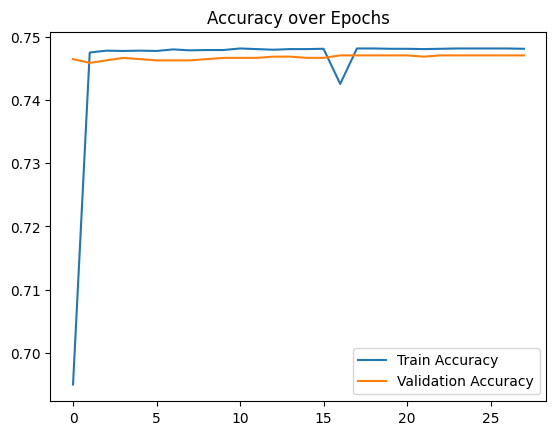

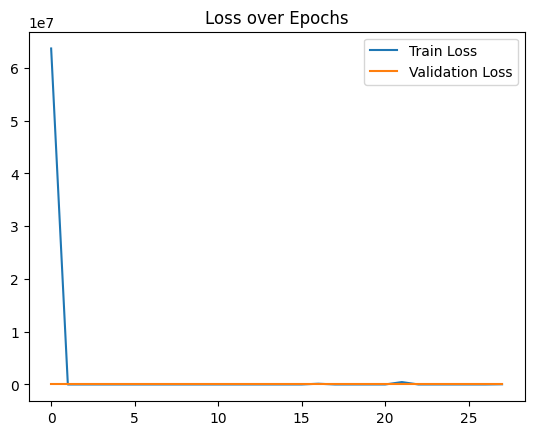

In [52]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


In [47]:
combined_gear_dataset['Time'] = (combined_gear_dataset['Time'] - combined_gear_dataset['Time'].min()).dt.total_seconds()
combined_gear_dataset

,Time,X-axis,Y-axis,Z-axis,Label
0,0.000000,0.020159,0.148535,0.160584,C
1,0.000313,0.091885,-0.155888,0.208752,C
2,0.000547,0.041483,0.069957,0.133137,C
3,0.000781,0.068123,-0.081188,0.189169,C
4,0.001016,0.151843,0.050306,0.198516,C
...,...,...,...,...,...
1586470,101.656797,-0.122361,0.041297,-0.084334,H
1586471,101.657031,-0.039999,-0.494681,0.033205,H
1586472,101.657500,0.015152,0.042288,0.030374,H
1586473,101.657813,-0.075847,0.072806,-0.042484,H


In [48]:
combined_gear_dataset['Time'] = pd.to_numeric(combined_gear_dataset['Time'], errors='coerce')

combined_gear_dataset = combined_gear_dataset.dropna()
combined_gear_dataset

,Time,X-axis,Y-axis,Z-axis,Label
0,0.000000,0.020159,0.148535,0.160584,C
1,0.000313,0.091885,-0.155888,0.208752,C
2,0.000547,0.041483,0.069957,0.133137,C
3,0.000781,0.068123,-0.081188,0.189169,C
4,0.001016,0.151843,0.050306,0.198516,C
...,...,...,...,...,...
1586470,101.656797,-0.122361,0.041297,-0.084334,H
1586471,101.657031,-0.039999,-0.494681,0.033205,H
1586472,101.657500,0.015152,0.042288,0.030374,H
1586473,101.657813,-0.075847,0.072806,-0.042484,H


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(combined_gear_dataset.head())

X = combined_gear_dataset[['Time', 'X-axis', 'Y-axis', 'Z-axis']]
y = combined_gear_dataset['Label'].map({'C': 1, 'H': 0})  # Encode labels (C = 1, H = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA reduced dimensions: {X_train_pca.shape[1]}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

y_pred = rf_model.predict(X_test_pca)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


       Time    X-axis    Y-axis    Z-axis Label
0  0.000000  0.020159  0.148535  0.160584     C
1  0.000313  0.091885 -0.155888  0.208752     C
2  0.000547  0.041483  0.069957  0.133137     C
3  0.000781  0.068123 -0.081188  0.189169     C
4  0.001016  0.151843  0.050306  0.198516     C
PCA reduced dimensions: 4
Confusion Matrix:
[[  7851  72132]
 [  9684 227628]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.10      0.16     79983
           1       0.76      0.96      0.85    237312

    accuracy                           0.74    317295
   macro avg       0.60      0.53      0.50    317295
weighted avg       0.68      0.74      0.67    317295

Accuracy: 74.21%


In [ ]:
from scipy.stats import skew, kurtosis
import numpy as np

# Function to extract features
def extract_features(segment):
    if all(col in segment.columns for col in ['X-axis', 'Y-axis', 'Z-axis']):
        features = {
            'mean_x': segment['X-axis'].mean(),
            'std_x': segment['X-axis'].std(),
            'skew_x': skew(segment['X-axis']),
            'kurt_x': kurtosis(segment['X-axis']),
            'crest_factor_x': np.max(np.abs(segment['X-axis'])) / np.sqrt(np.mean(segment['X-axis']**2)),

            'mean_y': segment['Y-axis'].mean(),
            'std_y': segment['Y-axis'].std(),
            'skew_y': skew(segment['Y-axis']),
            'kurt_y': kurtosis(segment['Y-axis']),

            'mean_z': segment['Z-axis'].mean(),
            'std_z': segment['Z-axis'].std(),
            'skew_z': skew(segment['Z-axis']),
            'kurt_z': kurtosis(segment['Z-axis']),
            'crest_factor_z': np.max(np.abs(segment['Z-axis'])) / np.sqrt(np.mean(segment['Z-axis']**2)),

        }
    else:
        print(f"Missing required columns in segment: {segment.columns}")
        return None
    return features

# Extract features for all segments
feature_list = []

for i, segment in enumerate(segments):
    if 'Label' in segment.columns:
        features = extract_features(segment)
        if features is not None:
            features['Label'] = segment['Label'].iloc[0]
            feature_list.append(features)
    else:
        print(f"Label column missing in segment {i}")
        continue

features_df = pd.DataFrame(feature_list)

print(features_df)


         mean_x     std_x    skew_x    kurt_x  crest_factor_x    mean_y  \
0     -0.033641  0.163317 -0.294755  2.827958        4.401877  0.004890   
1     -0.062674  0.189867 -0.222873  0.995000        3.669931 -0.020361   
2     -0.003443  0.160797 -0.673497  0.575540        3.371370 -0.022995   
3      0.035180  0.140050 -0.088047 -0.399561        2.799601 -0.002706   
4      0.018157  0.138480  0.060721 -0.259631        2.895151  0.016685   
...         ...       ...       ...       ...             ...       ...   
31723 -0.015938  0.123414 -0.436283 -0.510332        2.637517  0.001867   
31724 -0.031772  0.127609 -0.344416 -0.333585        2.813193 -0.004567   
31725 -0.021648  0.134323 -0.132538  0.000657        2.719520 -0.005763   
31726 -0.004364  0.133424 -0.283586 -0.186965        2.506673 -0.000426   
31727  0.023702  0.147587 -0.074854 -0.418969        2.592554  0.007959   

          std_y    skew_y    kurt_y    mean_z     std_z    skew_z    kurt_z  \
0      0.369332 -0.0

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = features_df.drop(columns=['Label'])
y = features_df['Label']

X_scaled = scaler.fit_transform(X)

scaled_features_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_features_df['Label'] = y.values

print("Scaled Features DataFrame:")
print(scaled_features_df)

Scaled Features DataFrame:
         mean_x     std_x    skew_x    kurt_x  crest_factor_x    mean_y  \
0      0.302425  0.161319  0.448492  0.086434        0.388992  0.492819   
1      0.224387  0.204677  0.454997  0.049784        0.279748  0.417443   
2      0.383594  0.157203  0.414219  0.041397        0.235187  0.409581   
3      0.487405  0.123323  0.467198  0.021899        0.149850  0.470145   
4      0.441650  0.120759  0.480660  0.024697        0.164111  0.528027   
...         ...       ...       ...       ...             ...       ...   
31723  0.350008  0.096155  0.435685  0.019684        0.125658  0.483795   
31724  0.307449  0.103005  0.443998  0.023218        0.151878  0.464590   
31725  0.334660  0.113970  0.463172  0.029902        0.137897  0.461018   
31726  0.381116  0.112501  0.449503  0.026150        0.106130  0.476949   
31727  0.456553  0.135631  0.468392  0.021511        0.118948  0.501978   

          std_y    skew_y    kurt_y    mean_z     std_z    skew_z    kur

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = scaled_features_df.drop(columns=['Label'])
y = scaled_features_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)

print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean Accuracy:", dt_cv_scores.mean())
print("Support Vector Machine Cross-Validation Scores:", svm_cv_scores)
print("Mean Accuracy:", svm_cv_scores.mean())


Random Forest Cross-Validation Scores: [0.81232272 0.83627482 0.88748818 0.89062254 0.90323089]
Mean Accuracy: 0.8659878302372486
Decision Tree Cross-Validation Scores: [0.74661204 0.77529152 0.81058935 0.83687943 0.85689519]
Mean Accuracy: 0.8052535069217047
Support Vector Machine Cross-Validation Scores: [0.80412858 0.81988654 0.86274819 0.87706856 0.88715524]
Mean Accuracy: 0.8501974227481334


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

param_grid = {
    'n_neighbors': range(1, 11),            # Range of k values
    'metric': ['euclidean', 'manhattan']    # Distance metrics
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # Use all cores
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Predict on the test set with the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best cross-validation accuracy: 0.8654163471196064
Test accuracy: 0.8629057674125433


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'] + [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

print("Tuning Hyperparameters for Random Forest...")
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid,
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest Accuracy:", rf_grid_search.best_score_)

print("\nTuning Hyperparameters for SVM...")
svm_grid_search = GridSearchCV(estimator=svm_classifier, param_grid=svm_param_grid,
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

print("Best SVM Parameters:", svm_grid_search.best_params_)
print("Best SVM Accuracy:", svm_grid_search.best_score_)


Tuning Hyperparameters for Random Forest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
488 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 0.8755811177682447

Tuning Hyperparameters for SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best SVM Parameters: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Best SVM Accuracy: 0.8883853898194751


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [30, 50, 100],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

svm_param_grid = {
    'C': [100, 300, 500],
    'gamma': ['scale'] + [10, 20, 50],
    'kernel': ['rbf']
}

rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

print("Tuning Hyperparameters for Random Forest...")
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest Accuracy:", rf_grid_search.best_score_)

print("\nTuning Hyperparameters for SVM...")
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid,
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

print("Best SVM Parameters:", svm_grid_search.best_params_)
print("Best SVM Accuracy:", svm_grid_search.best_score_)


Tuning Hyperparameters for Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Random Forest Accuracy: 0.8769207242352717

Tuning Hyperparameters for SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best SVM Parameters: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Best SVM Accuracy: 0.8883853898194751


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_val_predict

def evaluate_model(classifier, X, y):
    # Get predictions using cross_val_predict
    y_pred = cross_val_predict(classifier, X, y, cv=5)  # 5-fold cross-validation

    # Calculate precision, recall, and F1 score
    # precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='weighted')

    # Print the classification report
    print(classification_report(y, y_pred))

    # Print the individual metrics
    # print("Precision:", precision)
    # print("Recall:", recall)
    # print("F1 Score:", f1)

# Evaluate each classifier
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())
print("Random Forest Classifier Metrics:")
evaluate_model(rf_model, X, y)

print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean Accuracy:", dt_cv_scores.mean())
print("\nDecision Tree Classifier Metrics:")
evaluate_model(dt_model, X, y)

print("Support Vector Machine Cross-Validation Scores:", svm_cv_scores)
print("Mean Accuracy:", svm_cv_scores.mean())
print("\nSupport Vector Machine Classifier Metrics:")
evaluate_model(svm_model, X, y)

Random Forest Cross-Validation Scores: [0.81232272 0.83627482 0.88748818 0.89062254 0.90323089]
Mean Accuracy: 0.8659878302372486
Random Forest Classifier Metrics:
              precision    recall  f1-score   support

           C       0.89      0.93      0.91     23732
           H       0.77      0.66      0.71      7996

    accuracy                           0.87     31728
   macro avg       0.83      0.80      0.81     31728
weighted avg       0.86      0.87      0.86     31728

Decision Tree Cross-Validation Scores: [0.74661204 0.77529152 0.81058935 0.83687943 0.85689519]
Mean Accuracy: 0.8052535069217047

Decision Tree Classifier Metrics:
              precision    recall  f1-score   support

           C       0.87      0.86      0.87     23732
           H       0.61      0.63      0.62      7996

    accuracy                           0.81     31728
   macro avg       0.74      0.75      0.75     31728
weighted avg       0.81      0.81      0.81     31728

Support Vector Ma